<a href="https://colab.research.google.com/github/Kuro2509/IA_ASCS/blob/main/PerceptonMulticapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image
import numpy as np

class Perceptron:
    def __init__(self, eta=0.01, n_inter=50, random_state=1):
        self.eta = eta
        self.n_inter = n_inter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_inter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
# ## Entrenar un modelo de preceptrón en el conjutno de datos iris
# ### Leer el conjunto de datos iris

import pandas as pd
# Cargar el conjunto de datos Breast Cancer Wisconsin (Original)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(url, header=None)

# Reemplazar los valores faltantes con NaN y eliminarlos
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Ver las últimas filas del dataframe para comprobar que se ha cargado correctamente
df.tail()



,0,1,2,3,4,5,6,7,8,9,10
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


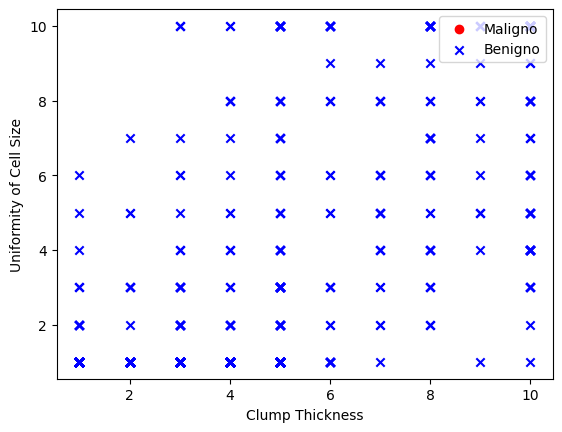

In [ ]:
import matplotlib.pyplot as plt
#import numpy as np
# Seleccionar las etiquetas de diagnóstico (maligno = 1, benigno = -1)
y = df.iloc[:, 10].values
y = np.where(y == '4', 1, -1)  # Maligno (4) = 1, Benigno (2) = -1

#entra longitud de sépalo y longitud de pétalo
X = df.iloc[:, [1, 2]].values

#representar los datos forma de graficos
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            color='red', marker='o', label='Maligno')
plt.scatter(X[y == -1, 0], X[y == -1, 1],
            color='blue', marker='x', label='Benigno')

plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.legend(loc='upper right')

plt.show()

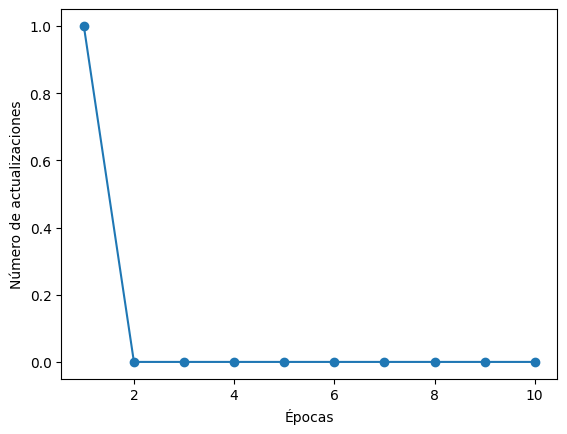

In [ ]:
# ### Entrenar el modelo de perceptron

ppn = Perceptron(eta=0.1, n_inter=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

plt.show()